## Import Necessary Functions

These are required to utilise functions specific for data analysis and visualisations.

In [2]:
## REQUIRED LIBRARIES
# For data wrangling 
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Read the Data

In [3]:

# Direct link to the CSV file on Google Drive
csv_url = 'https://drive.google.com/uc?id=14HTdhAmJd_U3mJDnwLHPbu6pvh-Yv0vu'

# Read the CSV file from the URL
df = pd.read_csv(csv_url)

df.shape


(10000, 14)

The DataFrame has 10000 rows with 14 attributes. We continue to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling can be done. 


## Initital Exploration

In [4]:
# A quick look
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .head(5) pandas function generates a well-structured format of the csv file with the first 5 rows organised.

In [5]:
# What attributes do we have? 
list(df.columns)

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [6]:

# Description of the data 
print(df.describe()) 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [7]:
# Check columns list and missing values

df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values!

In [8]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

From the above, we will not require the first 2 attributes as these are specific to a customer. For data privacy, we remove the surname as well.

In [9]:
# Drop the columns as explained above
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

The parameter axis = 1 specifies we want to drop these labels from the column. 

We will exclude RowNumber, CustomerId and Surname for reasons explained above.

In [10]:
# Review the top rows of what is left of the data frame
print(df.head(5))
print(df.shape)

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
(10000, 11)


Notice we now have 1000 rows and only 11 attributes. 

In [11]:
# Check variable data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

So we mostly have categorical variables and 5 continuous variables.

## Exploratory Data Analysis

Here our main interest is to get an understanding as to how the given attributes relate too the 'Exit' status.



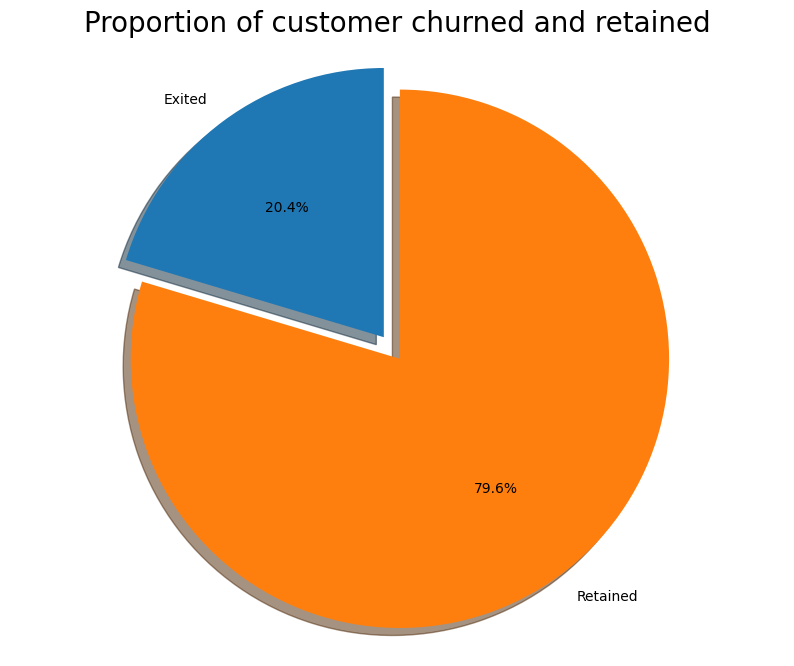

In [12]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

# We first review Exited vs Churned in relation to the categorical variables

We want to analyse the number of individuals who exited in relation to a categorical variable. For instance, we want to determine how many customers either exited or remained in Germany.

<Axes: xlabel='IsActiveMember', ylabel='count'>

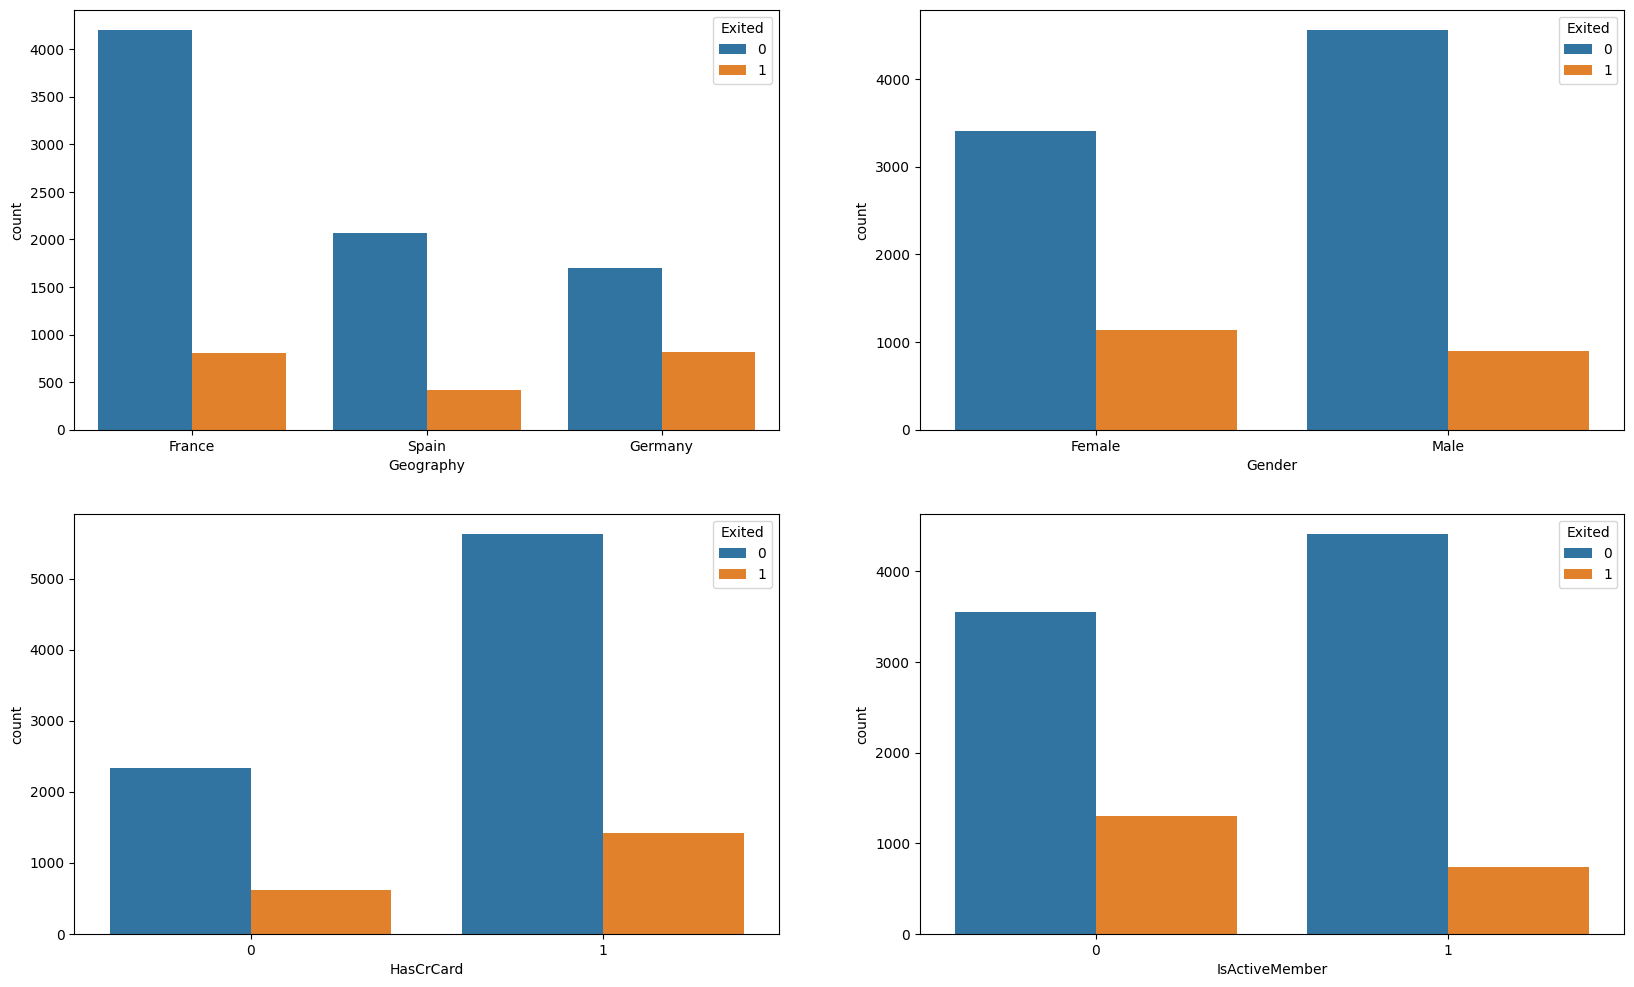

In [13]:
    # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

fig, axis = plt.subplots(2,2,figsize = (20,12))


# Next we review how the continuous data attributes relates to Exited vs Retained 

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

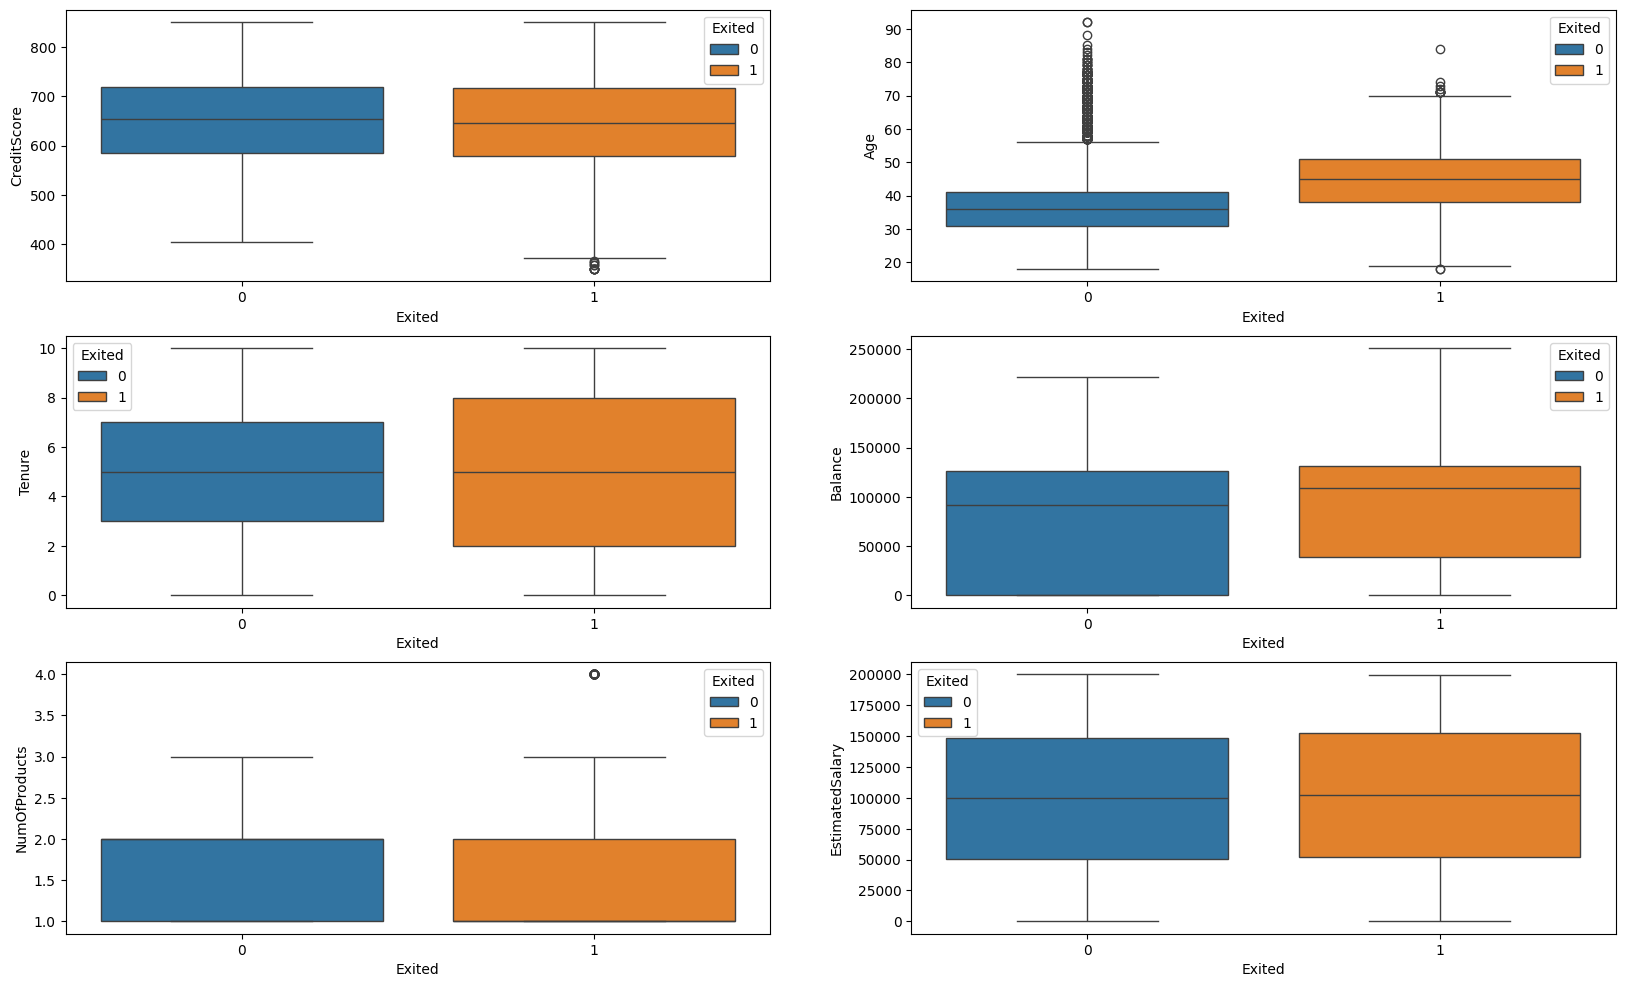

In [14]:
  # Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])



We note the following:
* There is no significant difference in the credit score distribution between retained and churned customers.
* The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups
* With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

# Feature Engineering
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets

In [15]:
# Split Train, test data
df_train = df.sample(frac=0.8,random_state=6)
df_test = df.drop(df_train.index)
print(len(df_train))
print(len(df_test))



8000
2000


(-1.0, 5.0)

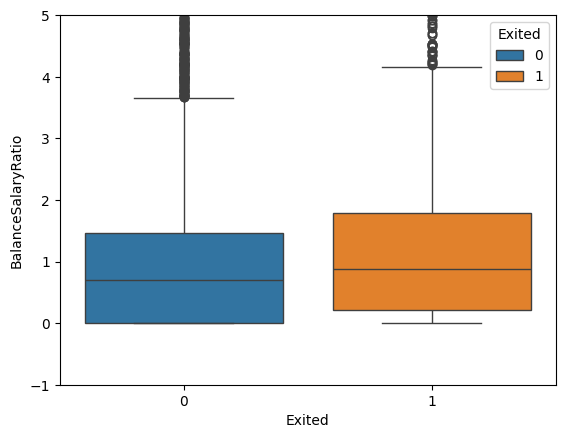

In [16]:
df_train['BalanceSalaryRatio'] = df_train.Balance/df_train.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 5)

we have seen that the salary has little effect on the chance of a customer churning. However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their source of loan capital.

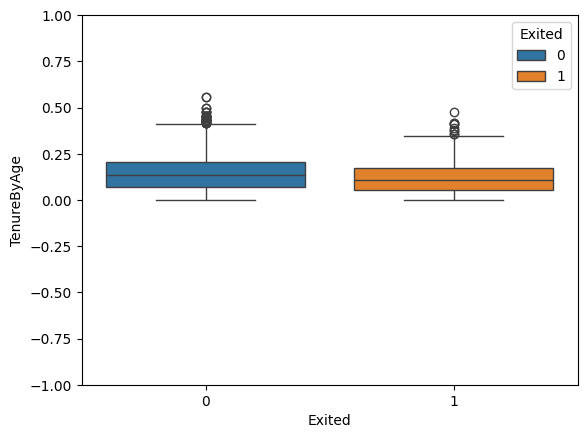

In [17]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
df_train['TenureByAge'] = df_train.Tenure/(df_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df_train)
plt.ylim(-1, 1)
plt.show()

In [18]:
'''Lastly we introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
:-)'''
df_train['CreditScoreGivenAge'] = df_train.CreditScore/(df_train.Age)

In [19]:
# Resulting Data Frame
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
739,692,France,Female,28,8,95059.02,2,1,0,44420.18,0,2.139996,0.285714,24.714286
9426,499,Spain,Female,53,1,75225.53,2,0,0,144849.10,1,0.519337,0.018868,9.415094
8200,767,Spain,Male,47,5,0.00,1,1,0,121964.46,1,0.000000,0.106383,16.319149
5880,537,France,Male,28,0,88963.31,2,1,1,189839.93,0,0.468623,0.000000,19.178571
9114,541,France,Male,36,5,0.00,2,1,0,124795.84,0,0.000000,0.138889,15.027778


In [20]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (df_train[i].dtype == str or df_train[i].dtype == object):
        for j in df_train[i].unique():
            df_train[i+'_'+j] = np.where(df_train[i] == j,1,-1)
        remove.append(i)
df_train = df_train.drop(remove, axis=1)
df_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
739,692,28,8,95059.02,2,1,0,44420.18,0,2.139996,0.285714,24.714286,1,-1,-1,1,-1
9426,499,53,1,75225.53,2,0,0,144849.10,1,0.519337,0.018868,9.415094,-1,1,-1,1,-1
8200,767,47,5,0.00,1,1,0,121964.46,1,0.000000,0.106383,16.319149,-1,1,-1,-1,1
5880,537,28,0,88963.31,2,1,1,189839.93,0,0.468623,0.000000,19.178571,1,-1,-1,-1,1
9114,541,36,5,0.00,2,1,0,124795.84,0,0.000000,0.138889,15.027778,1,-1,-1,-1,1


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df_train.drop('Exited', axis =1) # Drop the target column 
y = df_train['Exited'] # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



Accuracy: 0.7837


/Users/matt/Documents/DST/Group_Assessment_1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


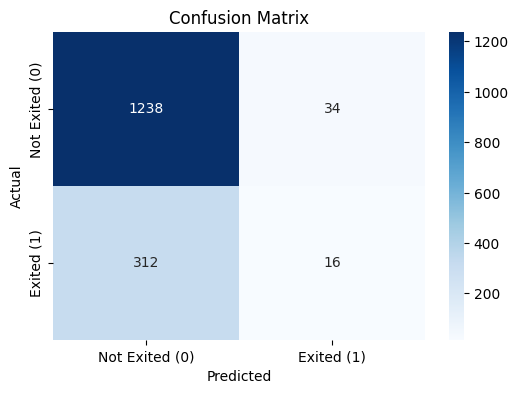

In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited (0)', 'Exited (1)'], yticklabels=['Not Exited (0)', 'Exited (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

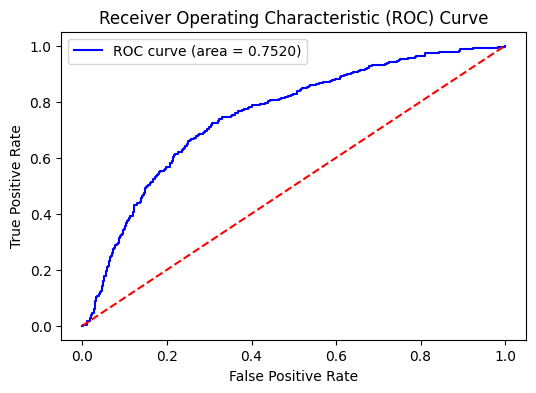

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_prob):.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [24]:
df_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'BalanceSalaryRatio',
       'TenureByAge', 'CreditScoreGivenAge', 'Geography_France',
       'Geography_Spain', 'Geography_Germany', 'Gender_Female', 'Gender_Male'],
      dtype='object')

/Users/matt/Documents/DST/Group_Assessment_1/.venv/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


<Axes: ylabel='Feature'>

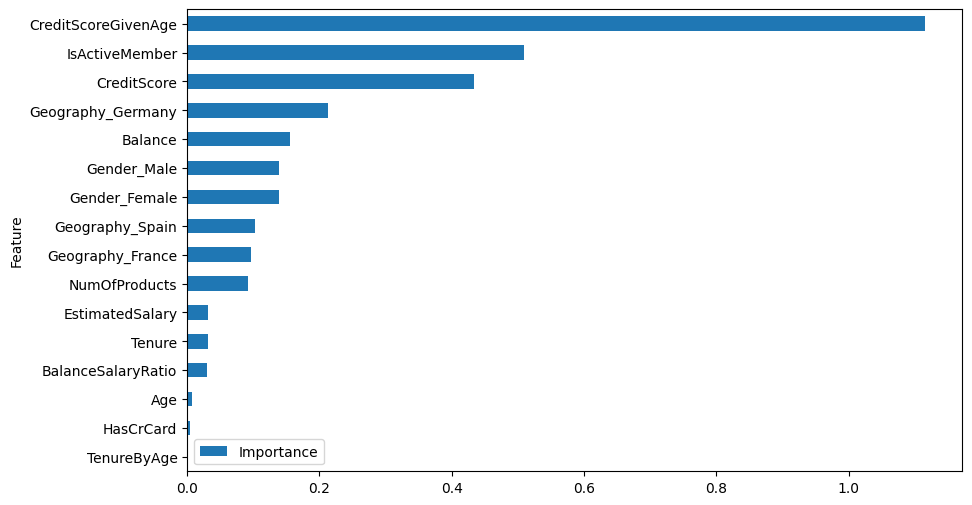

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_teast = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature':X.columns,'Importance':np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending  = True)
feature_importance.plot(x='Feature', y ='Importance', kind = 'barh',figsize = (10,6))





In [ ]:
df_train()